<a href="https://colab.research.google.com/github/GautamaShastry/Potato-disease-classification/blob/main/potato_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [55]:
## constants
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [56]:
## loading the dataset from google drive
train_df = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/drive/MyDrive/Deep Learning Projects/Potato/Training",
      shuffle=True,
      image_size = (IMAGE_SIZE,IMAGE_SIZE),
      batch_size = BATCH_SIZE
    )

Found 3274 files belonging to 3 classes.


In [57]:
test_df = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/drive/MyDrive/Deep Learning Projects/Potato/Testing",
      shuffle=True,
      image_size = (IMAGE_SIZE,IMAGE_SIZE),
      batch_size = BATCH_SIZE
    )
valid_df = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/drive/MyDrive/Deep Learning Projects/Potato/Validation",
      shuffle=True,
      image_size = (IMAGE_SIZE,IMAGE_SIZE),
      batch_size = BATCH_SIZE
    )

Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [58]:
class_names = train_df.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [59]:
for image_batch,label_batch in train_df.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[2 1 2 2 1 0 0 0 1 1 0 2 2 2 0 0 1 2 2 0 2 0 2 2 0 2 1 0 0 2 0 2]


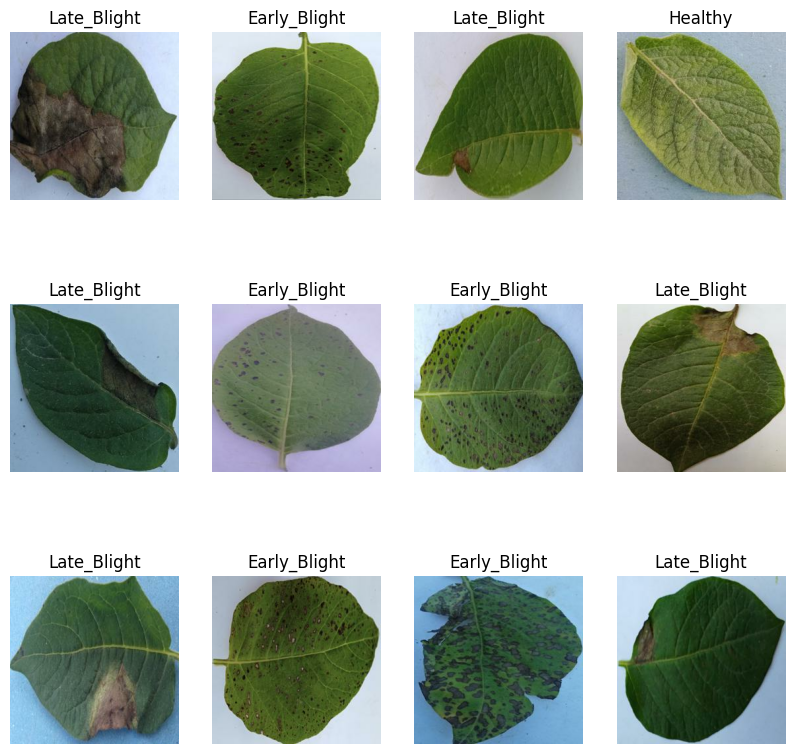

In [60]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in train_df.take(1):
    for i in range(12):
        ax=plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [61]:
## Normalize the images to a scale of 0-1
def process(images,label):
  images = tf.cast(images/255. ,tf.float32)
  return images,label

train_df = train_df.map(process)
test_df = test_df.map(process)
valid_df = valid_df.map(process)

In [62]:
## implementation of cnn
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [63]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [65]:
## compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [66]:
#early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [67]:
history = model.fit(train_df,batch_size = BATCH_SIZE ,validation_data = valid_df,epochs=100, callbacks=early_stopping)

Epoch 1/100
103/103 [==============================] - 14s 106ms/step - loss: 1.0316 - accuracy: 0.4753 - val_loss: 0.8351 - val_accuracy: 0.5865
Epoch 2/100
103/103 [==============================] - 11s 101ms/step - loss: 0.7829 - accuracy: 0.6659 - val_loss: 0.8708 - val_accuracy: 0.7043
Epoch 3/100
103/103 [==============================] - 11s 104ms/step - loss: 0.6445 - accuracy: 0.7416 - val_loss: 0.4489 - val_accuracy: 0.8413
Epoch 4/100
103/103 [==============================] - 11s 107ms/step - loss: 0.5260 - accuracy: 0.8021 - val_loss: 0.6072 - val_accuracy: 0.7812
Epoch 5/100
103/103 [==============================] - 11s 104ms/step - loss: 0.4579 - accuracy: 0.8213 - val_loss: 0.4572 - val_accuracy: 0.8221
Epoch 6/100
103/103 [==============================] - 11s 104ms/step - loss: 0.4223 - accuracy: 0.8360 - val_loss: 0.4043 - val_accuracy: 0.8462
Epoch 7/100
103/103 [==============================] - 11s 103ms/step - loss: 0.3772 - accuracy: 0.8662 - val_loss: 0.3685 -

In [68]:
scores = model.evaluate(test_df)

13/13 [==============================] - 1s 43ms/step - loss: 0.6471 - accuracy: 0.9259


In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

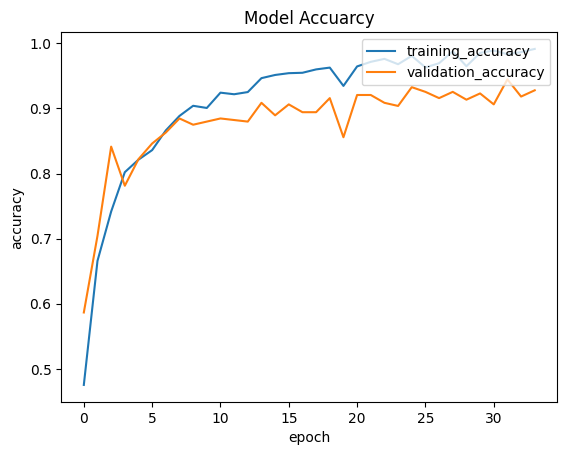

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training_accuracy','validation_accuracy'],loc='upper right')
plt.show()

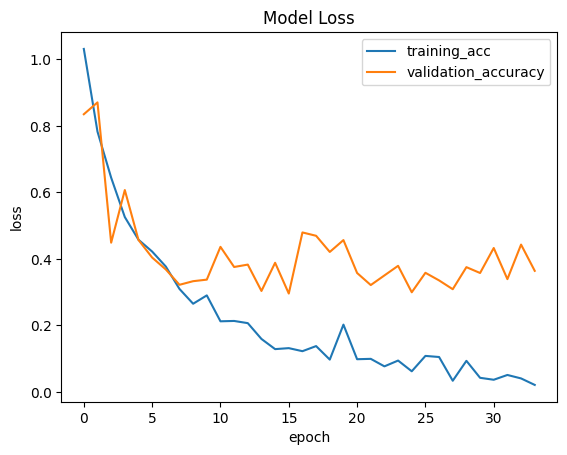

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training_acc','validation_accuracy'],loc='upper right')
plt.show()

In [72]:
model.save('potato_disease.h5')

The first image to be predicted
The label is Late_Blight
1/1 [==============================] - 0s 112ms/step
The predicted label is: Late_Blight


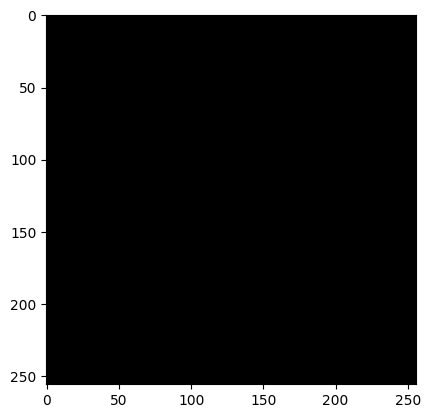

In [73]:
for image_batch, label_batch in test_df.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print('The first image to be predicted')
    print(f'The label is {class_names[first_label]}')
    plt.imshow(first_image)
    batch_prediction=model.predict(image_batch)
    print(f'The predicted label is: {class_names[np.argmax(batch_prediction[0])]}')

In [74]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())

    img_array = tf.expand_dims(img_array, 0) # creates a batch for an image
    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


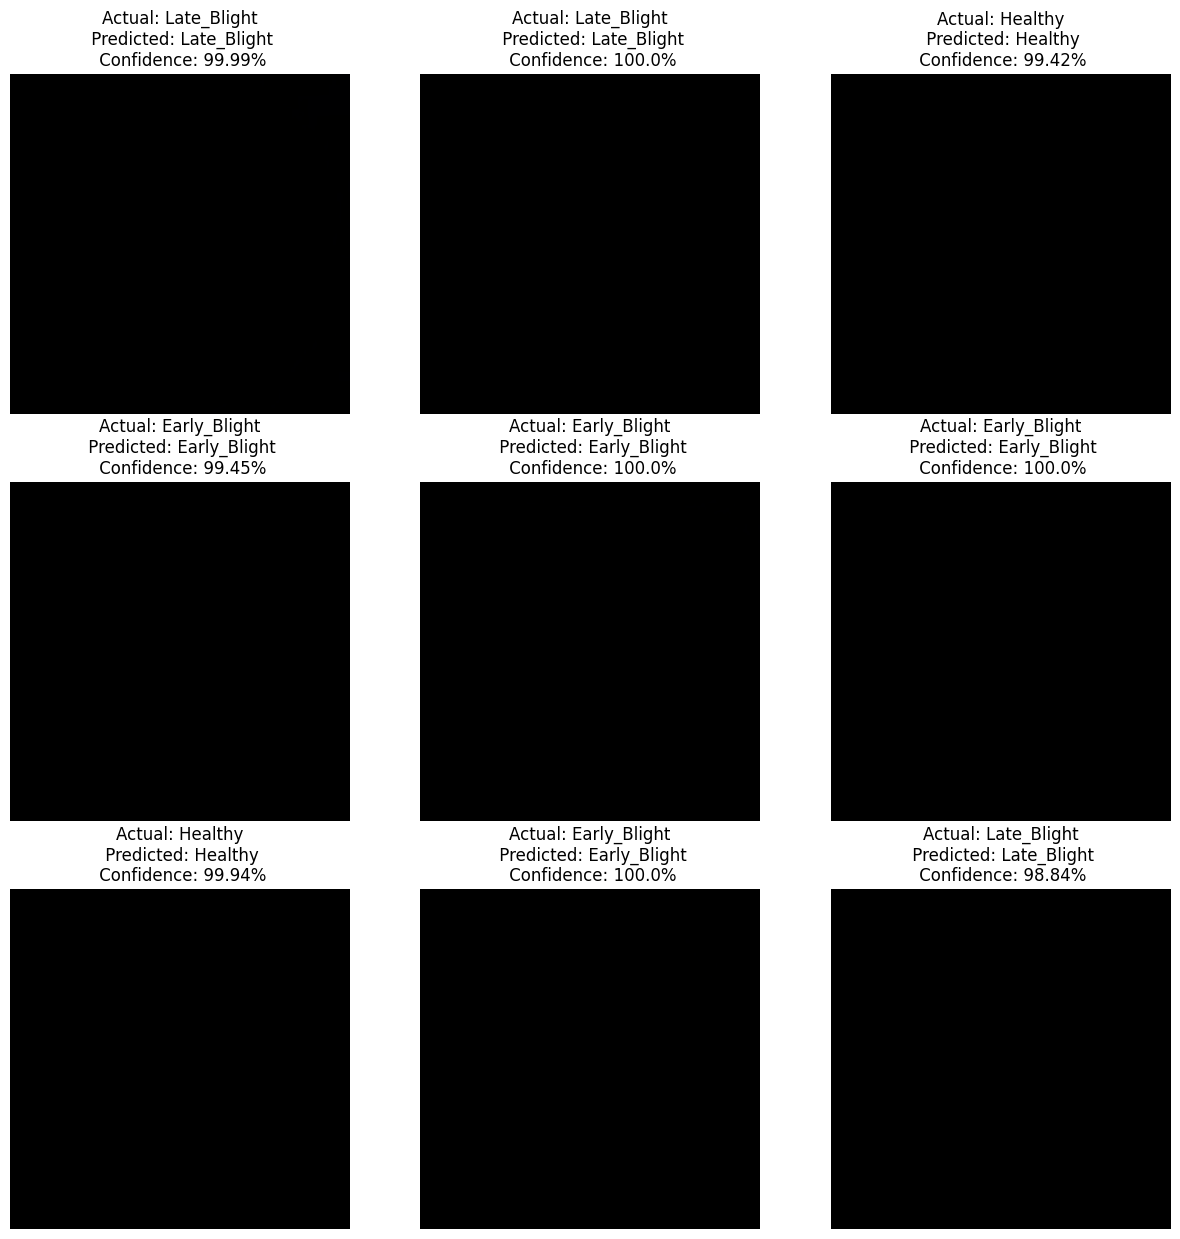

In [75]:
plt.figure(figsize=(15,15))
for images, labels in test_df.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}\n Confidence: {confidence}%")

        plt.axis("off")